<a href="https://colab.research.google.com/github/atifalimd/ML-Projects/blob/main/Movie_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle.json': b'{"username":"atifalimd","key":"02b78047d307e8639d3f15894b83d04c"}'}

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! kaggle datasets download -d rounakbanik/the-movies-dataset

the-movies-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip 'the-movies-dataset.zip'

Archive:  the-movies-dataset.zip
replace credits.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: credits.csv             
  inflating: keywords.csv            
  inflating: links.csv               
  inflating: links_small.csv         
  inflating: movies_metadata.csv     
  inflating: ratings.csv             
  inflating: ratings_small.csv       


In [5]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
movies=pd.read_csv('movies_metadata.csv')

In [7]:
keywords=pd.read_csv('keywords.csv')

In [8]:
credits=pd.read_csv('credits.csv')

In [9]:
movies.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [10]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [11]:
drop_feat=[ 'homepage','poster_path','production_countries','spoken_languages','tagline','status','belongs_to_collection','original_title','overview','video','spoken_languages','production_companies','runtime']

In [12]:
movies=movies.drop(columns=drop_feat)

In [13]:
movies

,adult,budget,genres,id,imdb_id,original_language,popularity,release_date,revenue,title,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,1995-10-30,373554033.0,Toy Story,7.7,5415.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,1995-12-15,262797249.0,Jumanji,6.9,2413.0
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,1995-12-22,0.0,Grumpier Old Men,6.5,92.0
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,1995-12-22,81452156.0,Waiting to Exhale,6.1,34.0
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,1995-02-10,76578911.0,Father of the Bride Part II,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,tt6209470,fa,0.072051,NaN,0.0,Subdue,4.0,1.0
45462,False,0,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,tl,0.178241,2011-11-17,0.0,Century of Birthing,9.0,3.0
45463,False,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,tt0303758,en,0.903007,2003-08-01,0.0,Betrayal,3.8,6.0
45464,False,0,[],227506,tt0008536,en,0.003503,1917-10-21,0.0,Satan Triumphant,0.0,0.0


In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              45466 non-null  object 
 1   budget             45466 non-null  object 
 2   genres             45466 non-null  object 
 3   id                 45466 non-null  object 
 4   imdb_id            45449 non-null  object 
 5   original_language  45455 non-null  object 
 6   popularity         45461 non-null  object 
 7   release_date       45379 non-null  object 
 8   revenue            45460 non-null  float64
 9   title              45460 non-null  object 
 10  vote_average       45460 non-null  float64
 11  vote_count         45460 non-null  float64
dtypes: float64(3), object(9)
memory usage: 4.2+ MB


In [15]:
drop_rows=[]
for index,row in movies.iterrows():
  row['id']=row['id'].split('-')
  if len(row['id'])>1:
    drop_rows.append(index)
print(drop_rows)

[19730, 29503, 35587]


In [16]:
movies=movies.drop(index=drop_rows)

In [17]:
movies['id']=movies['id'].astype(int)

In [18]:
movies=movies.merge(keywords,on='id')

In [19]:
df=movies.merge(credits,on='id')

In [20]:
df.head()

,adult,budget,genres,id,imdb_id,original_language,popularity,release_date,revenue,title,vote_average,vote_count,keywords,cast,crew
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,1995-10-30,373554033.0,Toy Story,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,1995-12-15,262797249.0,Jumanji,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,1995-12-22,0.0,Grumpier Old Men,6.5,92.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,1995-12-22,81452156.0,Waiting to Exhale,6.1,34.0,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,1995-02-10,76578911.0,Father of the Bride Part II,5.7,173.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46628 entries, 0 to 46627
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              46628 non-null  object 
 1   budget             46628 non-null  object 
 2   genres             46628 non-null  object 
 3   id                 46628 non-null  int64  
 4   imdb_id            46611 non-null  object 
 5   original_language  46617 non-null  object 
 6   popularity         46624 non-null  object 
 7   release_date       46540 non-null  object 
 8   revenue            46624 non-null  float64
 9   title              46624 non-null  object 
 10  vote_average       46624 non-null  float64
 11  vote_count         46624 non-null  float64
 12  keywords           46628 non-null  object 
 13  cast               46628 non-null  object 
 14  crew               46628 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 5.7+ MB


In [22]:
df.isnull().sum()

adult                 0
budget                0
genres                0
id                    0
imdb_id              17
original_language    11
popularity            4
release_date         88
revenue               4
title                 4
vote_average          4
vote_count            4
keywords              0
cast                  0
crew                  0
dtype: int64

In [23]:
df.dropna(inplace=True)

In [24]:
df=df.drop_duplicates()

In [25]:
df.shape

(45350, 15)

In [26]:
df.head(3)

,adult,budget,genres,id,imdb_id,original_language,popularity,release_date,revenue,title,vote_average,vote_count,keywords,cast,crew
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,1995-10-30,373554033.0,Toy Story,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,1995-12-15,262797249.0,Jumanji,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,1995-12-22,0.0,Grumpier Old Men,6.5,92.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."


In [27]:
df['adult'].value_counts()

False    45342
True         8
Name: adult, dtype: int64

In [28]:
df['adult'][df['adult']=='False']

0        False
1        False
2        False
3        False
4        False
         ...  
46622    False
46624    False
46625    False
46626    False
46627    False
Name: adult, Length: 45342, dtype: object

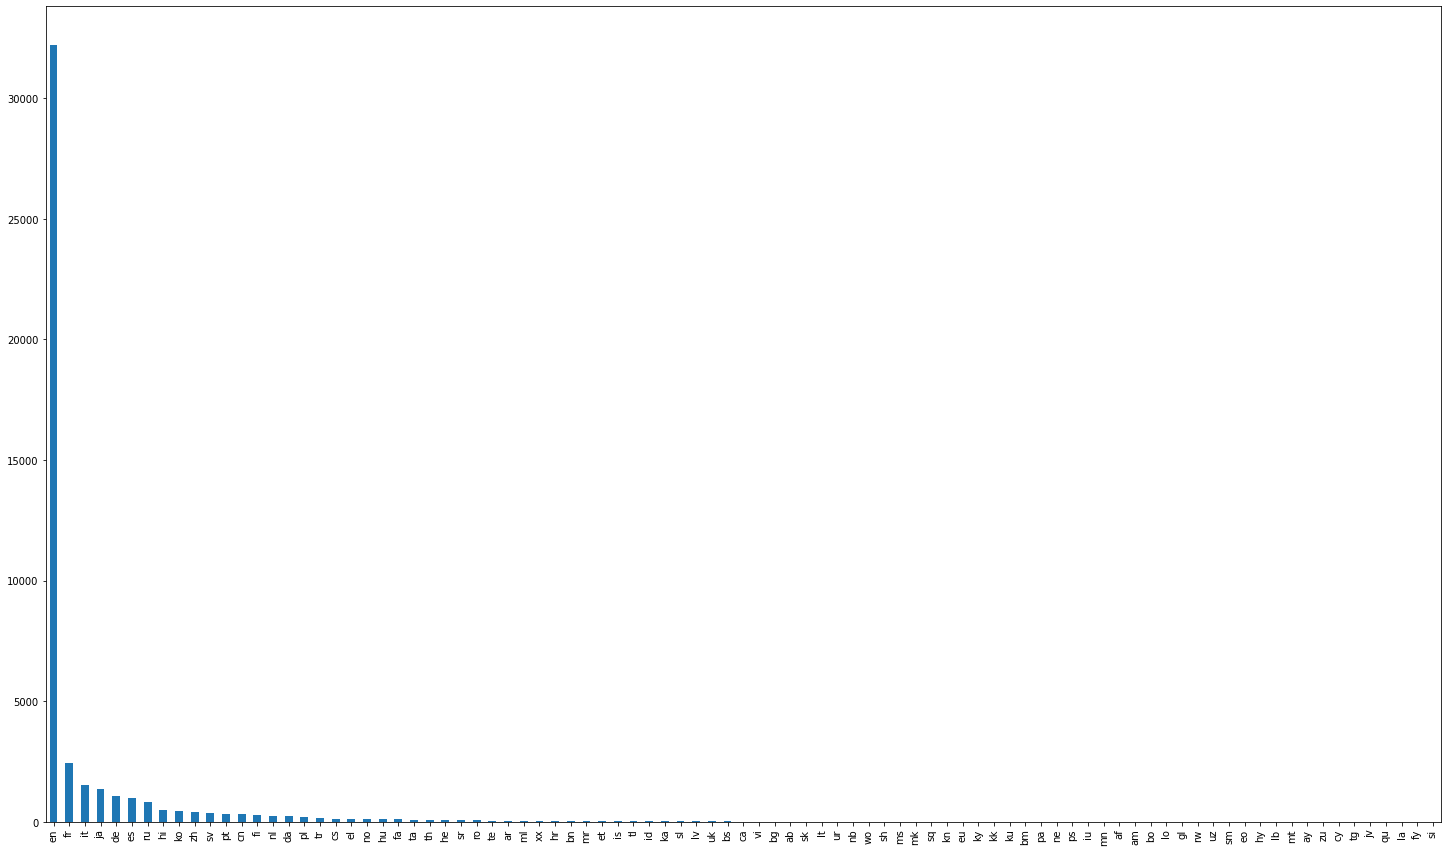

In [29]:
fig=plt.figure(figsize=[25,15])
ax=fig.subplots()
df['original_language'].value_counts().plot(kind='bar')
plt.show()

In [30]:
df['original_language'].value_counts()

en    32193
fr     2437
it     1528
ja     1350
de     1077
      ...  
jv        1
qu        1
la        1
fy        1
si        1
Name: original_language, Length: 89, dtype: int64

In [31]:
'''we will go with only english language'''

'we will go with only english language'

In [32]:
df=df[df['original_language']=='en']

In [33]:
df.reset_index(inplace=True,drop=True)

In [34]:
top_15_revenue_movies=df['revenue'].nlargest(15)

In [35]:
top_15_revenue_movies=top_15_revenue_movies.index

In [36]:
highest_revenue_movies=df.iloc[top_15_revenue_movies]

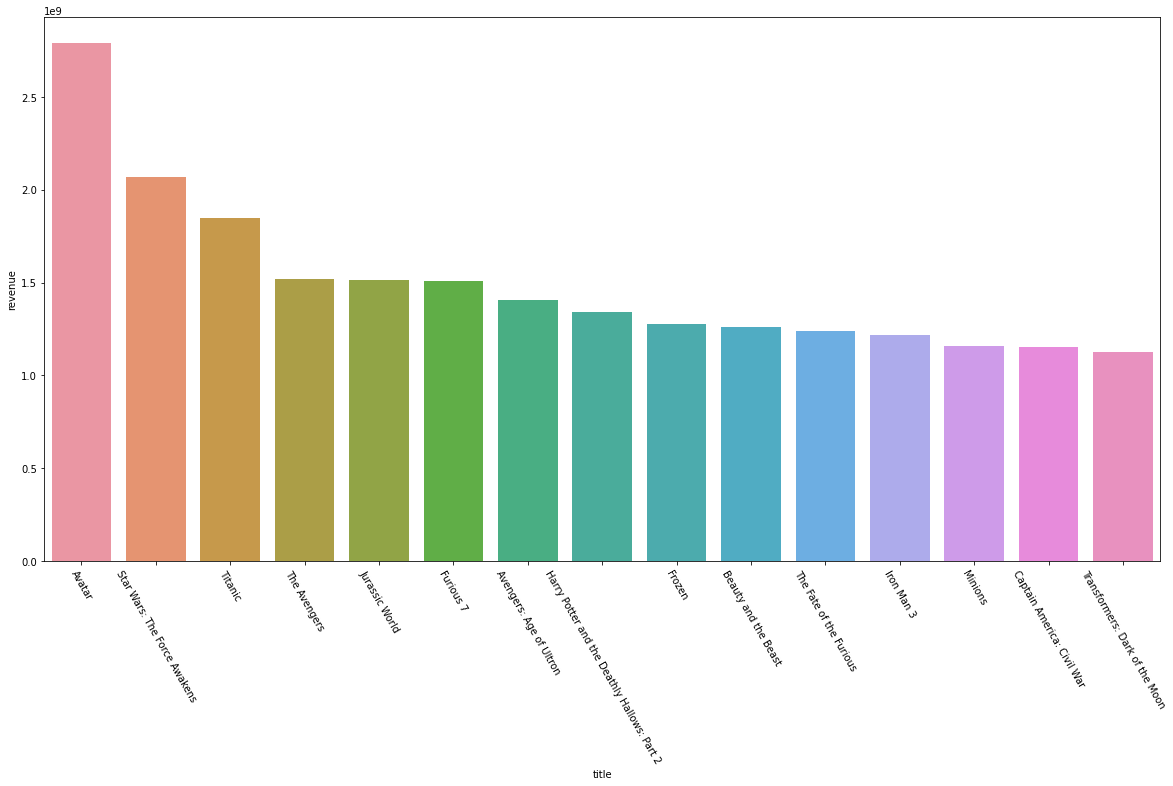

In [37]:
fig,ax=plt.subplots(figsize=(20,10))
sns.barplot(x='title',y='revenue',data=highest_revenue_movies)
plt.xticks(rotation=300)
plt.show()

In [38]:
'Budget,popularity,votes,date'

'Budget,popularity,votes,date'

In [39]:
df.head(2)

,adult,budget,genres,id,imdb_id,original_language,popularity,release_date,revenue,title,vote_average,vote_count,keywords,cast,crew
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,1995-10-30,373554033.0,Toy Story,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,1995-12-15,262797249.0,Jumanji,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."


In [40]:
df['budget'].sort_values(ascending=False)[:15]

9586       994000
25436    99000000
28686     9900000
28579     9900000
22882      980385
3727     98000000
14       98000000
12205      980000
3077       980000
22287      978000
10897     9750000
30681    97000000
30227    97000000
11573      970000
21428          97
Name: budget, dtype: object

In [41]:
df['budget']=df['budget'].astype(int)

In [42]:

top_15_budget=df['budget'].nlargest(15)

In [43]:
top_15_budget_ind=top_15_budget.index

In [44]:
max_budget_movies=df.iloc[top_15_budget_ind]

In [45]:
import plotly.express as px

In [46]:
plt.figure(figsize=(20,15))
fig=px.histogram(max_budget_movies,x='title',y='budget',color="budget",title='max_budget_movies')
labels=dict(title='Movies',budget='Budget')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

<Figure size 1440x1080 with 0 Axes>

In [47]:
df['popularity']=df['popularity'].astype(float)

In [48]:
top_15_popular=df['popularity'].nlargest(15)

In [49]:
top_15_popular_ind=top_15_popular.index.to_list()

In [50]:
most_popular_movies=df.iloc[top_15_popular_ind]

In [51]:
plt.figure(figsize=(20,15))
fig=px.histogram(data_frame=most_popular_movies,x='title',y='popularity',color='popularity',title='Most Popular Movies')
labels=dict(title='Movies',popularity='Popularity')
fig.update_layout(barmode='stack',xaxis={'categoryorder':'total descending'})
fig.show()

<Figure size 1440x1080 with 0 Axes>

In [52]:
df['vote_count']=df['vote_count'].astype(int)

In [53]:
top_15_vote=df['vote_count'].nlargest(15).index

In [54]:
max_vote_movies=df.iloc[top_15_vote]

In [55]:
plt.figure(figsize=(20,15))
fig=px.histogram(data_frame=max_vote_movies,x='title',y='vote_count',color='vote_count',title='max_vote_movies')
labels=dict(title='Movies',vote_count='Vote Count')
fig.update_layout(barmode='stack',xaxis={'categoryorder':'total descending'})
fig.show()

<Figure size 1440x1080 with 0 Axes>

In [56]:
df['release_year']=df['release_date'].apply(lambda x:x.split('-')[0])

In [57]:
df['release_year']=df['release_year'].astype(int)

In [58]:
df.drop(columns=['release_date'],inplace=True)

In [59]:
df.drop('vote_average',axis=1,inplace=True)

In [60]:
(df['release_year']<1990).shape

(32193,)

In [61]:
drop_rows=df[df['release_year']<1990].index

In [62]:
df.drop(index=drop_rows,inplace=True)

In [63]:
df.shape

(20959, 14)

In [64]:
df.head(3)

,adult,budget,genres,id,imdb_id,original_language,popularity,revenue,title,vote_count,keywords,cast,crew,release_year
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,373554033.0,Toy Story,5415,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",1995
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,262797249.0,Jumanji,2413,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",1995
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.712900,0.0,Grumpier Old Men,92,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",1995


In [65]:
data=df.copy()

In [66]:
data.drop(columns=['adult','budget','popularity','revenue','vote_count','imdb_id','original_language'],inplace=True)

In [67]:
data.sample(3)

,genres,id,title,keywords,cast,crew,release_year
12322,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",41142,Under the North Star,[],"[{'cast_id': 5, 'character': 'Akseli Koskela',...","[{'credit_id': '52fe45b7c3a36847f80d66a3', 'de...",2009
30463,"[{'id': 35, 'name': 'Comedy'}]",416290,Cedric the Entertainer: Live from the Ville,"[{'id': 9716, 'name': 'stand-up comedy'}]","[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '57dc787892514179d8000b57', 'de...",2016
3791,"[{'id': 35, 'name': 'Comedy'}]",32458,Forgotten Silver,"[{'id': 2658, 'name': 'new zealand'}, {'id': 4...","[{'cast_id': 12, 'character': 'Narrator (voice...","[{'credit_id': '52fe44d29251416c9101e095', 'de...",1995


In [68]:
import re
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize

In [69]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [70]:
def strng_collection(text):
  text=re.sub("[^a-zA-Z]"," ",text) ###re.sub("[a-zA-Z]","",text): Means substitute anything  except a-zA-Z with blank space
  text=text.lower()
  text=text.replace("id","")
  text=text.replace('name','')
  text=nltk.word_tokenize(text)
  text=' '.join(text)
  return text

In [71]:
data['genres']=data['genres'].apply(strng_collection)

In [72]:
data['keywords']=data['keywords'].apply(strng_collection)

In [73]:
data.head()

,genres,id,title,keywords,cast,crew,release_year
0,animation comedy family,862,Toy Story,jealousy toy boy friendship friends rivalry bo...,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",1995
1,adventure fantasy family,8844,Jumanji,board game disappearance based on children s b...,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",1995
2,romance comedy,15602,Grumpier Old Men,fishing best friend duringcreditsstinger old men,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",1995
3,comedy drama romance,31357,Waiting to Exhale,based on novel interracial relationship single...,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",1995
4,comedy,11862,Father of the Bride Part II,baby mlife crisis confence aging daughter moth...,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",1995


In [74]:
import ast

In [75]:
def convert_to_word(text):
  l=[]
  for i in ast.literal_eval(text):
    l.append(i['name'].lower())
  return l

In [76]:
data['crew']=data['crew'].apply(convert_to_word)

In [77]:
data['cast']=data['cast'].apply(convert_to_word)

In [78]:
data.head(3)

,genres,id,title,keywords,cast,crew,release_year
0,animation comedy family,862,Toy Story,jealousy toy boy friendship friends rivalry bo...,"[tom hanks, tim allen, don rickles, jim varney...","[john lasseter, joss whedon, andrew stanton, j...",1995
1,adventure fantasy family,8844,Jumanji,board game disappearance based on children s b...,"[robin williams, jonathan hyde, kirsten dunst,...","[larry j. franco, jonathan hensleigh, james ho...",1995
2,romance comedy,15602,Grumpier Old Men,fishing best friend duringcreditsstinger old men,"[walter matthau, jack lemmon, ann-margret, sop...","[howard deutch, mark steven johnson, mark stev...",1995


In [79]:
data.reset_index(drop=True,inplace=True)

In [80]:
data['genres']=data['genres'].apply(lambda x:x.split())

In [81]:
data['title']=data['title'].apply(lambda x:x.split())

In [82]:
data['keywords']=data['keywords'].apply(lambda x:x.split())

In [83]:
data.head()

,genres,id,title,keywords,cast,crew,release_year
0,"[animation, comedy, family]",862,"[Toy, Story]","[jealousy, toy, boy, friendship, friends, riva...","[tom hanks, tim allen, don rickles, jim varney...","[john lasseter, joss whedon, andrew stanton, j...",1995
1,"[adventure, fantasy, family]",8844,[Jumanji],"[board, game, disappearance, based, on, childr...","[robin williams, jonathan hyde, kirsten dunst,...","[larry j. franco, jonathan hensleigh, james ho...",1995
2,"[romance, comedy]",15602,"[Grumpier, Old, Men]","[fishing, best, friend, duringcreditsstinger, ...","[walter matthau, jack lemmon, ann-margret, sop...","[howard deutch, mark steven johnson, mark stev...",1995
3,"[comedy, drama, romance]",31357,"[Waiting, to, Exhale]","[based, on, novel, interracial, relationship, ...","[whitney houston, angela bassett, loretta devi...","[forest whitaker, ronald bass, ronald bass, ez...",1995
4,[comedy],11862,"[Father, of, the, Bride, Part, II]","[baby, mlife, crisis, confence, aging, daughte...","[steve martin, diane keaton, martin short, kim...","[alan silvestri, elliot davis, nancy meyers, n...",1995


In [84]:
obj_cols=data.select_dtypes('object').columns

In [85]:
l=[]
for i in obj_cols:
    l.append(data[data[i].apply(lambda x:len(x)==0)].index.to_list())

In [86]:
l1,l2,l3=l[2:]

In [87]:
drop_indices=l1+l2+l3

In [88]:
data.drop(index=drop_indices,inplace=True)

In [89]:
data

,genres,id,title,keywords,cast,crew,release_year
0,"[animation, comedy, family]",862,"[Toy, Story]","[jealousy, toy, boy, friendship, friends, riva...","[tom hanks, tim allen, don rickles, jim varney...","[john lasseter, joss whedon, andrew stanton, j...",1995
1,"[adventure, fantasy, family]",8844,[Jumanji],"[board, game, disappearance, based, on, childr...","[robin williams, jonathan hyde, kirsten dunst,...","[larry j. franco, jonathan hensleigh, james ho...",1995
2,"[romance, comedy]",15602,"[Grumpier, Old, Men]","[fishing, best, friend, duringcreditsstinger, ...","[walter matthau, jack lemmon, ann-margret, sop...","[howard deutch, mark steven johnson, mark stev...",1995
3,"[comedy, drama, romance]",31357,"[Waiting, to, Exhale]","[based, on, novel, interracial, relationship, ...","[whitney houston, angela bassett, loretta devi...","[forest whitaker, ronald bass, ronald bass, ez...",1995
4,[comedy],11862,"[Father, of, the, Bride, Part, II]","[baby, mlife, crisis, confence, aging, daughte...","[steve martin, diane keaton, martin short, kim...","[alan silvestri, elliot davis, nancy meyers, n...",1995
...,...,...,...,...,...,...,...
20949,"[drama, family, tv, movie]",39562,"[To, Be, Fat, Like, Me]","[overweight, independent, film, prejudice, tee...","[kaley cuoco, caroline rhea, melissa halstrom,...","[m. a. lovretta, douglas barr]",2007
20950,[comedy],14008,"[Cadet, Kelly]","[military, school]","[hilary duff, christy carlson romano, gary col...","[gail parent, michael walsh, larry shaw]",2002
20951,"[animation, family]",14885,"[Pooh's, Heffalump, Halloween, Movie]","[halloween, winnie, the, pooh]","[jimmy bennett, peter cullen, jim cummings, jo...","[saul blinkoff, elliot m. bour, evan spiliotop...",2005
20953,"[mystery, horror]",390959,"[Shadow, of, the, Blair, Witch]","[blair, witch]","[tony abatemarco, andre brooks, mariclare cost...","[ben rock, ben rock, jay bogdanowitsch, pirie ...",2000


In [90]:
for i in obj_cols:
  data[i]=data[i].apply(lambda x: ' '.join(x))

In [91]:
data

,genres,id,title,keywords,cast,crew,release_year
0,animation comedy family,862,Toy Story,jealousy toy boy friendship friends rivalry bo...,tom hanks tim allen don rickles jim varney wal...,john lasseter joss whedon andrew stanton joel ...,1995
1,adventure fantasy family,8844,Jumanji,board game disappearance based on children s b...,robin williams jonathan hyde kirsten dunst bra...,larry j. franco jonathan hensleigh james horne...,1995
2,romance comedy,15602,Grumpier Old Men,fishing best friend duringcreditsstinger old men,walter matthau jack lemmon ann-margret sophia ...,howard deutch mark steven johnson mark steven ...,1995
3,comedy drama romance,31357,Waiting to Exhale,based on novel interracial relationship single...,whitney houston angela bassett loretta devine ...,forest whitaker ronald bass ronald bass ezra s...,1995
4,comedy,11862,Father of the Bride Part II,baby mlife crisis confence aging daughter moth...,steve martin diane keaton martin short kimberl...,alan silvestri elliot davis nancy meyers nancy...,1995
...,...,...,...,...,...,...,...
20949,drama family tv movie,39562,To Be Fat Like Me,overweight independent film prejudice teenage ...,kaley cuoco caroline rhea melissa halstrom mic...,m. a. lovretta douglas barr,2007
20950,comedy,14008,Cadet Kelly,military school,hilary duff christy carlson romano gary cole s...,gail parent michael walsh larry shaw,2002
20951,animation family,14885,Pooh's Heffalump Halloween Movie,halloween winnie the pooh,jimmy bennett peter cullen jim cummings john f...,saul blinkoff elliot m. bour evan spiliotopoul...,2005
20953,mystery horror,390959,Shadow of the Blair Witch,blair witch,tony abatemarco andre brooks mariclare costell...,ben rock ben rock jay bogdanowitsch pirie jone...,2000


In [92]:
from nltk import PorterStemmer,WordNetLemmatizer

In [93]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [94]:
from nltk.corpus import stopwords

In [95]:
stemmer=PorterStemmer()
def stem(text):
  text=text.split(" ")
  text=[stemmer.stem(word) for word in text if word not in stopwords.words('english')]
  text=' '.join(text)
  return text

In [96]:
for index, row in data.iterrows() :
  text = row["keywords"]
  preprocessed_text = stem(text)
  row["keywords_data"] = preprocessed_text

In [97]:
data.head()

,genres,id,title,keywords,cast,crew,release_year
0,animation comedy family,862,Toy Story,jealousy toy boy friendship friends rivalry bo...,tom hanks tim allen don rickles jim varney wal...,john lasseter joss whedon andrew stanton joel ...,1995
1,adventure fantasy family,8844,Jumanji,board game disappearance based on children s b...,robin williams jonathan hyde kirsten dunst bra...,larry j. franco jonathan hensleigh james horne...,1995
2,romance comedy,15602,Grumpier Old Men,fishing best friend duringcreditsstinger old men,walter matthau jack lemmon ann-margret sophia ...,howard deutch mark steven johnson mark steven ...,1995
3,comedy drama romance,31357,Waiting to Exhale,based on novel interracial relationship single...,whitney houston angela bassett loretta devine ...,forest whitaker ronald bass ronald bass ezra s...,1995
4,comedy,11862,Father of the Bride Part II,baby mlife crisis confence aging daughter moth...,steve martin diane keaton martin short kimberl...,alan silvestri elliot davis nancy meyers nancy...,1995


In [98]:
data["keywords"][1056]

'indivual gay father son relationship rome robbery treasure portland cocaine generations confilct aho hustler german seattle narkolepsy pink bathrobe prostitution gay sex incest lgbt road movie'

In [99]:
credits=pd.read_csv('credits.csv')

In [100]:
credits

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [101]:
def whole_word(text):
  text=ast.literal_eval(text)
  return text

In [102]:
credits['crew']=credits['crew'].apply(whole_word)

In [103]:
credits.reset_index(inplace=True)

In [104]:
credits.head()

,index,cast,crew,id
0,0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [105]:
crew_len=len(credits['crew'])

In [106]:
crew_len

45476

In [107]:
crew=pd.Series(credits['crew'])

In [108]:
crew

0        [{'credit_id': '52fe4284c3a36847f8024f49', 'de...
1        [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...
2        [{'credit_id': '52fe466a9251416c75077a89', 'de...
3        [{'credit_id': '52fe44779251416c91011acb', 'de...
4        [{'credit_id': '52fe44959251416c75039ed7', 'de...
                               ...                        
45471    [{'credit_id': '5894a97d925141426c00818c', 'de...
45472    [{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...
45473    [{'credit_id': '52fe4776c3a368484e0c8387', 'de...
45474    [{'credit_id': '533bccebc3a36844cf0011a7', 'de...
45475    [{'credit_id': '593e676c92514105b702e68e', 'de...
Name: crew, Length: 45476, dtype: object

In [109]:
l_name=[]
l_i=[]
for i in range(crew_len):
  for j in crew[i]:
    if j['job']=='Director':
      l_name.append(j['name'])
      l_i.append(i)

In [110]:
temp=pd.DataFrame(l_name,l_i,columns=['Director'])

In [111]:
temp

,Director
0,John Lasseter
1,Joe Johnston
2,Howard Deutch
3,Forest Whitaker
4,Charles Shyer
...,...
45471,Hamid Nematollah
45472,Lav Diaz
45473,Mark L. Lester
45474,Yakov Protazanov


In [112]:
temp.reset_index(inplace=True)

In [113]:
temp.shape

(49048, 2)

In [114]:
index=temp.index.tolist()

In [115]:
temp.head()

,index,Director
0,0,John Lasseter
1,1,Joe Johnston
2,2,Howard Deutch
3,3,Forest Whitaker
4,4,Charles Shyer


In [116]:
credits.shape

(45476, 4)

In [117]:
credits=pd.merge(credits,temp,how='right',on='index')

In [118]:
data.head()

,genres,id,title,keywords,cast,crew,release_year
0,animation comedy family,862,Toy Story,jealousy toy boy friendship friends rivalry bo...,tom hanks tim allen don rickles jim varney wal...,john lasseter joss whedon andrew stanton joel ...,1995
1,adventure fantasy family,8844,Jumanji,board game disappearance based on children s b...,robin williams jonathan hyde kirsten dunst bra...,larry j. franco jonathan hensleigh james horne...,1995
2,romance comedy,15602,Grumpier Old Men,fishing best friend duringcreditsstinger old men,walter matthau jack lemmon ann-margret sophia ...,howard deutch mark steven johnson mark steven ...,1995
3,comedy drama romance,31357,Waiting to Exhale,based on novel interracial relationship single...,whitney houston angela bassett loretta devine ...,forest whitaker ronald bass ronald bass ezra s...,1995
4,comedy,11862,Father of the Bride Part II,baby mlife crisis confence aging daughter moth...,steve martin diane keaton martin short kimberl...,alan silvestri elliot davis nancy meyers nancy...,1995


In [119]:
credits.head()

,index,cast,crew,id,Director
0,0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,John Lasseter
1,1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,Joe Johnston
2,2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,Howard Deutch
3,3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,Forest Whitaker
4,4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,Charles Shyer


In [120]:
credits.shape

(49048, 5)

In [121]:
df=data.merge(credits,on='id')

In [122]:
df=df[['cast_x','keywords','Director','genres','id','release_year','title']]

In [123]:
df.head()

,cast_x,keywords,Director,genres,id,release_year,title
0,tom hanks tim allen don rickles jim varney wal...,jealousy toy boy friendship friends rivalry bo...,John Lasseter,animation comedy family,862,1995,Toy Story
1,robin williams jonathan hyde kirsten dunst bra...,board game disappearance based on children s b...,Joe Johnston,adventure fantasy family,8844,1995,Jumanji
2,walter matthau jack lemmon ann-margret sophia ...,fishing best friend duringcreditsstinger old men,Howard Deutch,romance comedy,15602,1995,Grumpier Old Men
3,whitney houston angela bassett loretta devine ...,based on novel interracial relationship single...,Forest Whitaker,comedy drama romance,31357,1995,Waiting to Exhale
4,steve martin diane keaton martin short kimberl...,baby mlife crisis confence aging daughter moth...,Charles Shyer,comedy,11862,1995,Father of the Bride Part II


In [124]:
df['tag']=df['cast_x']+df['keywords']+df['genres']+df['Director']

In [125]:
df=df[['id','title','release_year','tag']]

In [126]:
df.shape

(15301, 4)

In [127]:
df.isnull().sum()

id              0
title           0
release_year    0
tag             0
dtype: int64

In [128]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from scipy.sparse import csr_matrix

In [129]:
cv=CountVectorizer()
cv.fit(df['tag'])

CountVectorizer()

In [130]:
x=cv.transform(df['tag'])

In [131]:
import scipy
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity

In [132]:
df1=pd.DataFrame.sparse.from_spmatrix(x)

In [133]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15301 entries, 0 to 15300
Columns: 87422 entries, 0 to 87421
dtypes: Sparse[int64, 0](87422)
memory usage: 7.1 MB


In [134]:
max(df1.max())

9

In [135]:
#since the max value in dataframe is 9 hence we can change data type from int64 to int8

In [136]:
df1=df1.astype('int8')

In [137]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15301 entries, 0 to 15300
Columns: 87422 entries, 0 to 87421
dtypes: Sparse[int8, 0](87422)
memory usage: 2.9 MB


In [138]:
#converting sparse dataframe into spare matrix
sdf = df1.astype(pd.SparseDtype("int8", 0))
sdf_matrix = scipy.sparse.csr_matrix(sdf.values)

In [139]:
df['title']=df['title'].apply(lambda x:x.lower())

In [140]:
print(sdf_matrix)

  (0, 2021)	1
  (0, 3069)	1
  (0, 9427)	2
  (0, 15259)	1
  (0, 15692)	1
  (0, 19845)	1
  (0, 21788)	1
  (0, 21928)	1
  (0, 25033)	1
  (0, 25057)	1
  (0, 26152)	1
  (0, 29301)	1
  (0, 29445)	1
  (0, 29458)	1
  (0, 34111)	1
  (0, 40017)	1
  (0, 40027)	1
  (0, 40197)	2
  (0, 45399)	1
  (0, 45534)	1
  (0, 45909)	1
  (0, 46741)	1
  (0, 52555)	1
  (0, 54336)	1
  (0, 56874)	1
  :	:
  (15299, 84760)	1
  (15299, 85147)	1
  (15299, 85782)	1
  (15300, 5562)	1
  (15300, 7757)	1
  (15300, 11144)	1
  (15300, 18634)	1
  (15300, 21796)	1
  (15300, 22911)	1
  (15300, 29154)	1
  (15300, 32409)	1
  (15300, 34914)	1
  (15300, 40495)	1
  (15300, 42702)	1
  (15300, 46019)	1
  (15300, 46269)	1
  (15300, 47991)	1
  (15300, 52680)	1
  (15300, 53642)	1
  (15300, 54070)	1
  (15300, 55876)	1
  (15300, 60018)	1
  (15300, 66134)	1
  (15300, 70604)	1
  (15300, 84841)	1


In [141]:
cos_similar=cosine_similarity(sdf_matrix)

In [142]:
pd.DataFrame(cos_similar)

,0,1,2,3,4,5,6,7,8,9,...,15291,15292,15293,15294,15295,15296,15297,15298,15299,15300
0,1.000000,0.032530,0.0,0.000000,0.000000,0.029311,0.045361,0.0,0.046524,0.112154,...,0.077152,0.000000,0.0,0.000000,0.027217,0.065372,0.077152,0.077152,0.042505,0.000000
1,0.032530,1.000000,0.0,0.021129,0.054681,0.017162,0.029881,0.0,0.027242,0.032835,...,0.000000,0.000000,0.0,0.024398,0.000000,0.057417,0.045175,0.045175,0.037333,0.050965
2,0.000000,0.000000,1.0,0.000000,0.000000,0.015667,0.018185,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.021129,0.0,1.000000,0.080875,0.063459,0.044194,0.0,0.040291,0.072846,...,0.033408,0.023837,0.0,0.000000,0.035355,0.000000,0.033408,0.033408,0.000000,0.037689
4,0.000000,0.054681,0.0,0.080875,1.000000,0.076641,0.063541,0.0,0.017379,0.083789,...,0.028820,0.020563,0.0,0.031129,0.030500,0.024419,0.057639,0.057639,0.023816,0.032513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15296,0.065372,0.057417,0.0,0.000000,0.024419,0.011497,0.026688,0.0,0.054745,0.000000,...,0.030261,0.000000,0.0,0.000000,0.032026,1.000000,0.000000,0.000000,0.000000,0.000000
15297,0.077152,0.045175,0.0,0.033408,0.057639,0.013568,0.094491,0.0,0.043073,0.129794,...,0.035714,0.025482,0.0,0.000000,0.037796,0.000000,1.000000,0.928571,0.029514,0.080582
15298,0.077152,0.045175,0.0,0.033408,0.057639,0.013568,0.094491,0.0,0.043073,0.129794,...,0.035714,0.025482,0.0,0.000000,0.037796,0.000000,0.928571,1.000000,0.029514,0.080582
15299,0.042505,0.037333,0.0,0.000000,0.023816,0.056063,0.039043,0.0,0.017798,0.064356,...,0.000000,0.042117,0.0,0.000000,0.031235,0.000000,0.029514,0.029514,1.000000,0.099889


In [143]:
title=pd.Series(df['title'])

In [144]:
title.head()

0                      toy story
1                        jumanji
2               grumpier old men
3              waiting to exhale
4    father of the bride part ii
Name: title, dtype: object

In [145]:
title[title=='thor'].index[0]

6838

In [146]:
def recommendation(movie):
  movie_id=title[title==movie].index[0]
  similarity_score=pd.Series(cos_similar[movie_id]).sort_values(ascending=False)
  top_5_movie_id=similarity_score[1:6].index.to_list()
  similar_5_movies=df.iloc[top_5_movie_id][['title','release_year']].reset_index(drop=True)
  similar_5_movies = similar_5_movies.set_index(pd.Index([1,2,3,4,5]))
  return similar_5_movies

In [147]:
while True:
  try:
    movie=input("Enter Movie name:").lower()
    print(recommendation(movie))
    break
  except:
    print("Enter correct name please: ")

Enter Movie name:spider-man
                        title  release_year
1                spider-man 2          2004
2                spider-man 3          2007
3  oz: the great and powerful          2013
4             drag me to hell          2009
5                  iron man 2          2010
